In [1]:
import os
import collections
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from settings import *

LANGUAGE = 'ja_en'

Matplotlib created a temporary config/cache directory at /home1/data5/bowen/tmp/matplotlib-osf_a0kz because the default path (/home1/data5/bowen/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def data_list(path, col=0):
    with open(path, "r", encoding="utf-8") as f:
        lines = f.readlines()
        _list = []
        for line in lines:
            line_list = line.strip().split("\t")
            _list.append(line_list[col])
    return _list

In [3]:
def triple_reader(dataset_path, triple_path):
    path_triple = os.path.join(dataset_path, triple_path)

    list_triple_left = data_list(path_triple, col=0)
    list_triple_right = data_list(path_triple, col=2)
    list_triple = list_triple_left + list_triple_right
    return list_triple

In [4]:
def rel_reader(dataset_path, triple_path):
    path_triple = os.path.join(dataset_path, triple_path)

    list_triple = data_list(path_triple, col=1)
    return list_triple

In [5]:
list_triple_1 = triple_reader(DATA_DIR+f'/DBP15K/{LANGUAGE}/', 'triples_1')
list_triple_2 = triple_reader(DATA_DIR+f'/DBP15K/{LANGUAGE}/', 'triples_2')

In [6]:
result1 = collections.Counter(list_triple_1)
result2 = collections.Counter(list_triple_2)
_num_1 = [i for i in result1.values()]
_num_2 = [i for i in result2.values()]

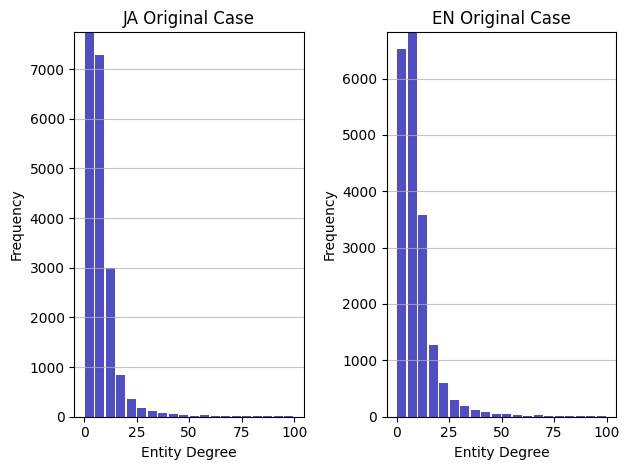

In [7]:
plt.figure()
ax1 = plt.subplot(1,2,1)
n, bins, patches = plt.hist(x=_num_1, bins=20, range=(0,100), color='#0504aa',
alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Entity Degree')
plt.ylabel('Frequency')
plt.title(f'{str.upper(LANGUAGE)[:2]} Original Case')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq+10)

ax2 = plt.subplot(1,2,2)
n, bins, patches = plt.hist(x=_num_2, bins=20, range=(0,100), color='#0504aa',
alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Entity Degree')
plt.ylabel('Frequency')
plt.title(f'{str.upper(LANGUAGE)[-2:]} Original Case')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq+10)

plt.tight_layout()
plt.savefig(IMG_DIR +f'/{LANGUAGE}_original_case.png')